# Pokemon！

# 对比不同神奇宝贝的体重

## 利用API获取精灵实体

In [ ]:
import pokebase as pb  # 神奇宝贝API
from PIL import Image  # 展示神奇宝贝的图片

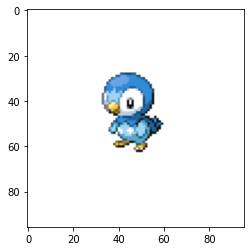

In [7]:
def get_pokemon_by_name_and_plot(name, plot=True, ax=None):
    pokemon = pb.APIResource('pokemon', name)  # 宝可梦
    sprite = pb.SpriteResource('pokemon', pokemon.id)  # 精灵
    if plot:  # 绘制宝可梦图片
        if not ax:
            _, ax = plt.subplots()
        img = Image.open(sprite.path)  # 精灵的图片
        ax.imshow(img)
    return pokemon
    
    
pikachu = get_pokemon_by_name_and_plot('piplup')

## 华夫饼图

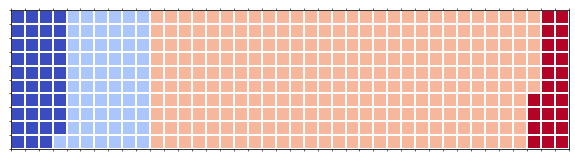

In [26]:
df = pd.DataFrame({
    'country': ['Argentina', 'Brazil', 'Cuba', 'Peru'],
    'number': [212, 334, 1500, 130] 
})

total = sum(df['number'])  # 数值加总，总共有多少
proportions = [(float(value) / total) for value in df['number']]  # 每个国家的比例


def waffle_plot(proportions, width=40, height=10, ax=None):

    # 华夫饼图的长和宽计算总共多少格子
    total= width * height

    # 根据长宽、每个实体的比例，计算每个实体分得的块数
    tiles_per_category = [round(proportion * total) for proportion in proportions]

    waffle = np.zeros((height, width))
    category_index = 0
    tile_index = 0
    for col in range(width):
        for row in range(height):
            tile_index += 1
            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1
            waffle[row, col] = category_index
        
    # 作图
    if not ax:
        fig, ax = plt.subplots()
    colormap = plt.cm.coolwarm
    ax.matshow(waffle, cmap=colormap)
    ax2 = plt.gca()
    ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    ax.set_xticks([])
    ax.set_yticks([])
#     ax.colorbar()

fig, ax = plt.subplots(figsize=(10, 6))
waffle_plot(proportions, ax=ax)
plt.show();

## 对比体重

对于精灵实体，都有哪些可以用的属性、方法

In [3]:
dir(pikachu)

['_APIResource__force_lookup',
 '_APIResource__loaded',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load',
 'abilities',
 'base_experience',
 'endpoint',
 'forms',
 'game_indices',
 'height',
 'held_items',
 'id',
 'id_',
 'is_default',
 'location_area_encounters',
 'moves',
 'name',
 'order',
 'species',
 'sprites',
 'stats',
 'types',
 'url',
 'weight']

In [4]:
pikachu.weight

60

In [20]:
compared_pokemon = ['squirtle', 'pikachu', 'bulbasaur', 'piplup']

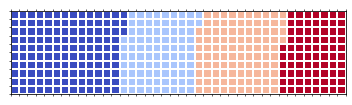

In [24]:
pokemon_weights = []
for pokemon in compared_pokemon:
    pokemon = get_pokemon_by_name_and_plot(pokemon, plot=False)
    pokemon_weights.append(pokemon.weight)
    
pokemon_weights = pd.Series(pokemon_weights, index=compared_pokemon)
waffle_plot(pokemon_weights/pokemon_weights.sum())

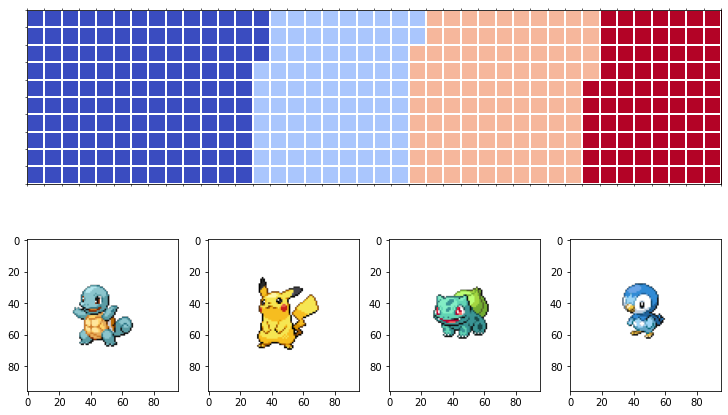

In [27]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(constrained_layout=True, figsize=(10, 6))
gs = GridSpec(2, 4, figure=fig)

ax1 = fig.add_subplot(gs[0, :])

pokemon_weights = []
for i, pokemon in enumerate(compared_pokemon):
    ax = fig.add_subplot(gs[1, i])
    pokemon = get_pokemon_by_name_and_plot(pokemon, ax=ax)
    pokemon_weights.append(pokemon.weight)
    
pokemon_weights = pd.Series(pokemon_weights, index=compared_pokemon)
waffle_plot(pokemon_weights/pokemon_weights.sum(), ax=ax1)